<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Background" data-toc-modified-id="Background-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Background</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Data-provided" data-toc-modified-id="Data-provided-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data provided</a></span><ul class="toc-item"><li><span><a href="#Data-reading" data-toc-modified-id="Data-reading-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Data reading</a></span></li><li><span><a href="#Data-cleaning:-tn_movie_budgets" data-toc-modified-id="Data-cleaning:-tn_movie_budgets-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Data cleaning: tn_movie_budgets</a></span></li><li><span><a href="#Data-cleaning:-imdb_title_basics" data-toc-modified-id="Data-cleaning:-imdb_title_basics-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Data cleaning: imdb_title_basics</a></span></li><li><span><a href="#Join-the-two-dataframes" data-toc-modified-id="Join-the-two-dataframes-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Join the two dataframes</a></span></li></ul></li><li><span><a href="#Additional-data" data-toc-modified-id="Additional-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Additional data</a></span><ul class="toc-item"><li><span><a href="#Web-scraping" data-toc-modified-id="Web-scraping-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Web scraping</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Data cleaning</a></span></li></ul></li></ul></li><li><span><a href="#Visualisations-and-Insights" data-toc-modified-id="Visualisations-and-Insights-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualisations and Insights</a></span><ul class="toc-item"><li><span><a href="#Movie-Industry-Trends" data-toc-modified-id="Movie-Industry-Trends-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Movie Industry Trends</a></span><ul class="toc-item"><li><span><a href="#Number-of-movies-released" data-toc-modified-id="Number-of-movies-released-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Number of movies released</a></span></li><li><span><a href="#Worldwide-gross" data-toc-modified-id="Worldwide-gross-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Worldwide gross</a></span></li></ul></li><li><span><a href="#Profit-and-Profit-Margin" data-toc-modified-id="Profit-and-Profit-Margin-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Profit and Profit Margin</a></span></li><li><span><a href="#Impact-of-Budget" data-toc-modified-id="Impact-of-Budget-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Impact of Budget</a></span></li><li><span><a href="#Runtime" data-toc-modified-id="Runtime-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Runtime</a></span></li><li><span><a href="#Genre" data-toc-modified-id="Genre-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Genre</a></span></li><li><span><a href="#Release-date" data-toc-modified-id="Release-date-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Release date</a></span></li><li><span><a href="#Exploring-franchises" data-toc-modified-id="Exploring-franchises-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Exploring franchises</a></span></li></ul></li><li><span><a href="#Conclusion-and-Future-Work" data-toc-modified-id="Conclusion-and-Future-Work-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion and Future Work</a></span></li></ul></div>

<b>Final Project Submission</b>

Please fill out:
* Student name: Nadine Amersi-Belton
* Student pace: part time
* Scheduled project review date/time: TBC
* Instructor name: TBC
* Blog post URL: TBC


# Introduction

## Problem Statement

## Background

# Data Preparation

In [1]:
# Import the necessary packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from glob import glob
from bs4 import BeautifulSoup
import requests

%matplotlib inline

## Data provided

### Data reading

In [2]:
# Create a list of all csv files using glob
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [3]:
# Create a dictionary of DataFrames
csv_dict = {}
for file in csv_files:
    filename = file.split('zippedData/')[-1].replace(".csv.gz", "").replace(".", "_") # Clean filename
    file_df = pd.read_csv(file) # Create DataFrame
    csv_dict[filename] = file_df # Insert DataFrame into dictionary

In [4]:
# Preview the data
for name, df in csv_dict.items():
    print(name)
    display(df.head()) # Using display instead of print leads to neater formatting in Jupyter Notebook
    print("------------------ \n")

imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


------------------ 

tmdb_movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


------------------ 

imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


------------------ 

imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


------------------ 

imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


------------------ 

imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


------------------ 

tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


------------------ 

bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


------------------ 

imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


------------------ 



In [5]:
# Create a list of all tsv files using glob
tsv_files = glob("./zippedData/*.tsv.gz")
tsv_files

['./zippedData/rt.reviews.tsv.gz', './zippedData/rt.movie_info.tsv.gz']

In [6]:
# Create a dictionary of DataFrames
tsv_dict = {}
for file in tsv_files:
    filename = file.split('zippedData/')[-1].replace(".tsv.gz", "").replace(".", "_") # Clean filename
    file_df = pd.read_table(file, delimiter = '\t', encoding = 'latin-1') # Create DataFrame
    tsv_dict[filename] = file_df # Insert dataframe into dictionary 

In [7]:
# Preview the data
for name, df in tsv_dict.items():
    print(name)
    display(df.head()) # Using display instead of print leads to neater formatting in Jupyter Notebook
    print("------------------ \n")

rt_reviews


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


------------------ 

rt_movie_info


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


------------------ 



<p style="color:red">TBD: Conclusion: Which DFs to study/ questions to look into</p>

### Data cleaning: tn_movie_budgets

Look at tn_movie_budgets dataframe as it has budget as well as gross. 

In [8]:
# Set tn_movie_budgets DataFrame as tnmb
tnmb = csv_dict['tn_movie_budgets']
tnmb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
# Get Summary
tnmb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [10]:
# See if any duplicates
tnmb.duplicated().any()

False

In [11]:
# Remove id column
tnmb = tnmb.drop('id', axis = 1)
tnmb.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [12]:
# Create new column release_year
# Select last 4 characters from release_date and convert to int type
tnmb['release_year']=tnmb['release_date'].map(lambda x: int(x[-4:]))
tnmb.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [13]:
# Convert release_date to a datetime object
tnmb['release_date'] = pd.to_datetime(tnmb['release_date'])

In [14]:
# Define function to clean numbers
def numclean(df,col):
    '''
    param1 = Pandas DataFrame
    param2 = Column
    Removes $ symbol, removes ',' seperator and changes to int type
    Returns DataFrame
    '''
    df[col]=df[col].str.replace("$","").str.replace(",","").astype('int')
    return df

In [15]:
# Run function on the three columns
numclean(tnmb,'production_budget')
numclean(tnmb,'domestic_gross')
numclean(tnmb,'worldwide_gross')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...
5777,2018-12-31,Red 11,7000,0,0,2018
5778,1999-04-02,Following,6000,48482,240495,1999
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005
5780,2015-09-29,A Plague So Pleasant,1400,0,0,2015


In [16]:
# Investigate rows where worldwide_gross is 0
tnmb[tnmb['worldwide_gross'] == 0]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
194,2020-12-31,Moonfall,150000000,0,0,2020
479,2017-12-13,Bright,90000000,0,0,2017
480,2019-12-31,Army of the Dead,90000000,0,0,2019
535,2020-02-21,Call of the Wild,82000000,0,0,2020
670,2019-08-30,PLAYMOBIL,75000000,0,0,2019
...,...,...,...,...,...,...
5761,2014-12-31,Stories of Our Lives,15000,0,0,2014
5764,2007-12-31,Tin Can Man,12000,0,0,2007
5771,2015-05-19,Family Motocross,10000,0,0,2015
5777,2018-12-31,Red 11,7000,0,0,2018


In [17]:
# Get number of rows where worldwide_gross is 0
len(tnmb[tnmb['worldwide_gross'] == 0])

367

Choose to remove these rows as small percentage of data.

In [18]:
# Keep only rows where worldwide_gross is non-zero
tnmb = tnmb[tnmb['worldwide_gross'] != 0]

In [19]:
# Explore release_year
tnmb['release_year'].describe()

count    5415.000000
mean     2003.599446
std        12.546965
min      1915.000000
25%      1999.000000
50%      2006.000000
75%      2012.000000
max      2019.000000
Name: release_year, dtype: float64

In [20]:
# Reset index
tnmb = tnmb.reset_index(drop = True)

In [21]:
# View first 5 rows
tnmb.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


This dataframe is ready.

### Data cleaning: imdb_title_basics

In [22]:
# Set imdb_title_basics as imdb
imdb = csv_dict['imdb_title_basics']
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [23]:
# Get Summary
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [24]:
# Get number of missing values per column
imdb.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [25]:
# % of missing values for runtime
(imdb['runtime_minutes'].isna().sum()/len(imdb)*100).round(2)

21.72

In [26]:
# Consider median
imdb['runtime_minutes'].median()

87.0

In [27]:
# Fill missing values with median
imdb['runtime_minutes'] = imdb['runtime_minutes'].fillna(imdb['runtime_minutes'].median())

In [28]:
# % of missing values for genre
(imdb['genres'].isna().sum()/len(imdb)*100).round(2)

3.7

In [29]:
# % of missing values for original_title
(imdb['original_title'].isna().sum()/len(imdb)*100).round(2)

0.01

In [30]:
# Drop rows that contain null values
imdb = imdb.dropna()

In [31]:
# Check for duplicates
imdb.duplicated().any()

False

In [45]:
# Explore release_year
imdb['start_year'].describe()

count    140734.000000
mean       2014.613945
std           2.735566
min        2010.000000
25%        2012.000000
50%        2015.000000
75%        2017.000000
max        2115.000000
Name: start_year, dtype: float64

In [46]:
futuremovies = imdb[imdb['start_year'] >= 2020]
futuremovies

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
33,tt0293429,Mortal Kombat,Mortal Kombat,2021,87.0,"Action,Adventure,Fantasy"
93,tt0427340,Masters of the Universe,Masters of the Universe,2021,87.0,"Action,Adventure,Drama"
229,tt0499097,Without Remorse,Without Remorse,2020,87.0,"Action,Crime,Drama"
289,tt0805647,The Witches,The Witches,2020,87.0,"Adventure,Comedy,Family"
386,tt0870154,Jungle Cruise,Jungle Cruise,2020,87.0,Adventure
...,...,...,...,...,...,...
145902,tt9883664,Equally Friends,Equally Friends,2020,47.0,"Biography,Comedy,Drama"
145905,tt9883996,Dream Horse,Dream Horse,2020,87.0,Drama
145914,tt9886444,Nuestra última fiesta,Nuestra última fiesta,2020,63.0,"Comedy,Crime,Horror"
145934,tt9887580,Bulletproof 2,Bulletproof 2,2020,87.0,"Action,Comedy"


In [47]:
# Rename primary title to movie and start_year to release_year
imdb = imdb.rename(columns = {'primary_title':'movie', 'start_year' : 'release_year'})
# Drop original title column
imdb = imdb.drop('original_title', axis = 1)

In [48]:
imdb.head()

,tconst,movie,release_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


This dataframe is ready

### Join the two dataframes

In [49]:
# Number of rows for tnmb and imdb DataFrames
display(len(tnmb), len(imdb))

5415

140734

Is name a unique identifyer?

In [50]:
# Number of movies with same name in tnmb
len(tnmb[tnmb.duplicated('movie')])

76

In [51]:
# Number of movies with same name in imdb
len(imdb[imdb.duplicated('movie')])

9400

In [52]:
# Sort tnmb by release year
tnmb = tnmb.sort_values('release_year', ascending = False)
# Drop duplicates, keep first occurence
tnmb = tnmb.drop_duplicates(subset = 'movie', keep = 'first')

In [53]:
tnmb.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
95,2019-03-08,Captain Marvel,175000000,426525952,1123061550,2019
1358,2019-05-31,Rocketman,41000000,57342725,108642725,2019
3814,2019-05-03,The Intruder,8000000,35095904,36005871,2019
3778,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,2019
254,2019-02-22,How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,2019


In [54]:
# Check using Godzilla
tnmb[tnmb['movie'] == 'Godzilla']

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
140,2014-05-16,Godzilla,160000000,200676069,529076069,2014


In [55]:
# Sort imdb by release date
imdb = imdb.sort_values('release_year', ascending = False)
# Drop duplicates, keep first occurence
imdb = imdb.drop_duplicates(subset = 'movie', keep = 'first')

In [56]:
# Drop release_year 
imdb = imdb.drop('release_year', axis = 1)

In [57]:
imdb.head()

,tconst,movie,runtime_minutes,genres
89506,tt5174640,100 Years,87.0,Drama
96592,tt5637536,Avatar 5,87.0,"Action,Adventure,Fantasy"
2949,tt10300398,Untitled Star Wars Film,87.0,Fantasy
52213,tt3095356,Avatar 4,87.0,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,87.0,"Adventure,Family,Fantasy"


In [58]:
# merge imdb and tnmb
movies = pd.merge(tnmb, imdb, on = ['movie'])

In [59]:
movies

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres
0,2019-03-08,Captain Marvel,175000000,426525952,1123061550,2019,tt4154664,123.0,"Action,Adventure,Sci-Fi"
1,2019-05-31,Rocketman,41000000,57342725,108642725,2019,tt2066051,121.0,"Biography,Drama,Music"
2,2019-05-03,The Intruder,8000000,35095904,36005871,2019,tt6722030,102.0,"Drama,Horror,Mystery"
3,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,2019,tt7961060,100.0,"Action,Adventure,Animation"
4,2019-02-22,How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,2019,tt2386490,104.0,"Action,Adventure,Animation"
...,...,...,...,...,...,...,...,...,...
2079,1942-08-13,Bambi,858000,102797000,268000000,1942,tt2668120,58.0,"Biography,Documentary"
2080,1940-11-13,Fantasia,2280000,83320000,83320000,1940,tt3591950,86.0,Drama
2081,1940-03-21,Rebecca,1288000,6000000,6002370,1940,tt10430534,87.0,Horror
2082,1937-12-21,Snow White and the Seven Dwarfs,1488000,184925486,184925486,1937,tt7821084,49.0,"Animation,Family"


<p style="color:red">TBD: Additional Data - webs scraping to look at franchise</p>

## Additional data

<p style="color:red">Interested in franchises as many if not most have Movie element and way for Microsoft to utilise existing IP.
Introduce Wiki page</p>

### Web scraping

In [60]:
#Obtain details of highest grossing franchises
url = requests.get('https://en.wikipedia.org/wiki/List_of_highest-grossing_media_franchises')
soup = BeautifulSoup(url.content, 'html.parser')

# Look for tables on wikipedia page.
tables = list(soup.findAll('table', {'class':'wikitable sortable'}))
len(tables)

2

In [61]:
# Look at first table, franchises over $10 billion
table10bil = tables[0]

# Seperate each entry in the table - start as 1 as 0 is just header
entries = table10bil.findAll('tr')[1:]

# Investigate first entry
entry = entries[0]
name = entry.findAll('td')[1].text.strip()
revenue = entry.findAll('td')[3].text.strip().replace("\n","")
originalmedia = entry.findAll('td')[5].text.replace("\n","")
owner = entry.findAll('td')[7].text.replace("\n","")
print(f"Name: {name}, Revenue: {revenue}, Original media : {originalmedia}, Owner: {owner}")

Name: Pokémon, Revenue: est. $95 billion, Original media : Video game, Owner: Nintendo (trademark)  The Pokémon Company  (Nintendo, Game Freak, Creatures) (copyright)


In [62]:
# Create lists 
names = [entry.findAll('td')[1].text.strip() for entry in entries]
revenues = [entry.findAll('td')[3].text.strip().replace("\n","") for entry in entries]
originalmedias = [entry.findAll('td')[5].text.replace("\n","") for entry in entries]
owners = [entry.findAll('td')[7].text.replace("\n","") for entry in entries]

In [63]:
# Create dataframe from lists
df_franchisesover10b = pd.DataFrame([names, revenues, originalmedias, owners]).transpose()
df_franchisesover10b.columns = ['Name', 'Revenue', 'Original Media', 'Owner']
df_franchisesover10b.head()

,Name,Revenue,Original Media,Owner
0,Pokémon,est. $95 billion,Video game,Nintendo (trademark) The Pokémon Company (Ni...
1,Hello Kitty,est. $86 billion,Cartoon character[38],Sanrio
2,Winnie the Pooh,est. $76 billion,Book[59],The Walt Disney Company
3,Mickey Mouse & Friends,est. $74 billion,Animated cartoon,The Walt Disney Company
4,Star Wars,est. $70 billion,Film,Lucasfilm (The Walt Disney Company)


In [64]:
# Do the same process to extract the second table
table4bil = tables[1]

# Seperate each entry in the table - start as 1 as 0 is just header
entries = table4bil.findAll('tr')[1:]

# Investigate first entry
entry = entries[0]

name = entry.findAll('td')[0].text.strip()
revenue = entry.findAll('td')[2].text.strip().replace("\n","")
originalmedia = entry.findAll('td')[4].text.replace("\n","")
owner = entry.findAll('td')[6].text.replace("\n","")
print(f"Name: {name}, Revenue: {revenue}, Original media : {originalmedia}, Owner: {owner}")

Name: Grand Theft Auto, Revenue: est. $9.99 billion, Original media : Video game, Owner: Rockstar Games  (Take-Two Interactive)


In [65]:
# Create lists 
names = [entry.findAll('td')[0].text.strip() for entry in entries]
revenues = [entry.findAll('td')[2].text.strip().replace("\n","") for entry in entries]
originalmedias = [entry.findAll('td')[4].text.replace("\n","") for entry in entries]
owners = [entry.findAll('td')[6].text.replace("\n","") for entry in entries]

In [66]:
# Create dataframe from lists
df_franchisesover4b = pd.DataFrame([names, revenues, originalmedias, owners]).transpose()
df_franchisesover4b.columns = ['Name', 'Revenue', 'Original Media', 'Owner']
df_franchisesover4b.head()

,Name,Revenue,Original Media,Owner
0,Grand Theft Auto,est. $9.99 billion,Video game,Rockstar Games (Take-Two Interactive)
1,JoJo's Bizarre Adventure,est. $9.8 billion,Manga,Hirohiko Araki Shueisha (Hitotsubashi Group) ...
2,Thomas & Friends,est. $9.48 billion,Book,Egmont Group Mattel
3,Lineage,est. $9.32 billion,Video game,NCSoft
4,Sesame Street (The Muppets),est. $9.19 billion,Television series,The Muppets Studio (The Walt Disney Company) ...


In [67]:
# Join both tables
df_franchises = df_franchisesover10b.append(df_franchisesover4b)
df_franchises

,Name,Revenue,Original Media,Owner
0,Pokémon,est. $95 billion,Video game,Nintendo (trademark) The Pokémon Company (Ni...
1,Hello Kitty,est. $86 billion,Cartoon character[38],Sanrio
2,Winnie the Pooh,est. $76 billion,Book[59],The Walt Disney Company
3,Mickey Mouse & Friends,est. $74 billion,Animated cartoon,The Walt Disney Company
4,Star Wars,est. $70 billion,Film,Lucasfilm (The Walt Disney Company)
...,...,...,...,...
52,The Hunger Games,est. $4.05 billion[ih],Novel,Scholastic Corporation Lionsgate
53,Magic: The Gathering,est. $4.02 billion,Card game,Wizards of the Coast (Hasbro)
54,Mission: Impossible,$4 billion[ij][571],Television series,Paramount Pictures
55,Strawberry Shortcake,est. $4 billion,Greeting card,American Greetings


### Data cleaning

In [68]:
# Reset index
df_franchises = df_franchises.reset_index(drop = True)
df_franchises

,Name,Revenue,Original Media,Owner
0,Pokémon,est. $95 billion,Video game,Nintendo (trademark) The Pokémon Company (Ni...
1,Hello Kitty,est. $86 billion,Cartoon character[38],Sanrio
2,Winnie the Pooh,est. $76 billion,Book[59],The Walt Disney Company
3,Mickey Mouse & Friends,est. $74 billion,Animated cartoon,The Walt Disney Company
4,Star Wars,est. $70 billion,Film,Lucasfilm (The Walt Disney Company)
...,...,...,...,...
105,The Hunger Games,est. $4.05 billion[ih],Novel,Scholastic Corporation Lionsgate
106,Magic: The Gathering,est. $4.02 billion,Card game,Wizards of the Coast (Hasbro)
107,Mission: Impossible,$4 billion[ij][571],Television series,Paramount Pictures
108,Strawberry Shortcake,est. $4 billion,Greeting card,American Greetings


In [69]:
# Transform revenue column into integer

In [70]:
microsoft_franchises = df_franchises [(df_franchises['Owner'] == 'Microsoft') | 
                                      (df_franchises['Owner'] == 'Microsoft Studios')] 

In [71]:
microsoft_franchises

,Name,Revenue,Original Media,Owner
71,Minecraft,est. $7.23 billion,Video game,Microsoft Studios
76,Halo,est. $6.5 billion,Video game,Microsoft


# Visualisations and Insights

## Movie Industry Trends

Recall our movies DataFrame:

In [72]:
# Movies first 5 rows
movies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres
0,2019-03-08,Captain Marvel,175000000,426525952,1123061550,2019,tt4154664,123.0,"Action,Adventure,Sci-Fi"
1,2019-05-31,Rocketman,41000000,57342725,108642725,2019,tt2066051,121.0,"Biography,Drama,Music"
2,2019-05-03,The Intruder,8000000,35095904,36005871,2019,tt6722030,102.0,"Drama,Horror,Mystery"
3,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,2019,tt7961060,100.0,"Action,Adventure,Animation"
4,2019-02-22,How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,2019,tt2386490,104.0,"Action,Adventure,Animation"


### Number of movies released

In [73]:
# Describe release_year column
movies['release_year'].describe()

count    2084.000000
mean     2010.086852
std         9.420340
min      1931.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2019.000000
Name: release_year, dtype: float64

In [74]:
# Create bins for each decade
bins = [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
names = [ '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', 'post 2010']

In [75]:
# Create decade column 
movies['decade'] = pd.cut(movies['release_year'], bins, labels=names)

In [76]:
# Check column added
movies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres,decade
0,2019-03-08,Captain Marvel,175000000,426525952,1123061550,2019,tt4154664,123.0,"Action,Adventure,Sci-Fi",post 2010
1,2019-05-31,Rocketman,41000000,57342725,108642725,2019,tt2066051,121.0,"Biography,Drama,Music",post 2010
2,2019-05-03,The Intruder,8000000,35095904,36005871,2019,tt6722030,102.0,"Drama,Horror,Mystery",post 2010
3,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,2019,tt7961060,100.0,"Action,Adventure,Animation",post 2010
4,2019-02-22,How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,2019,tt2386490,104.0,"Action,Adventure,Animation",post 2010


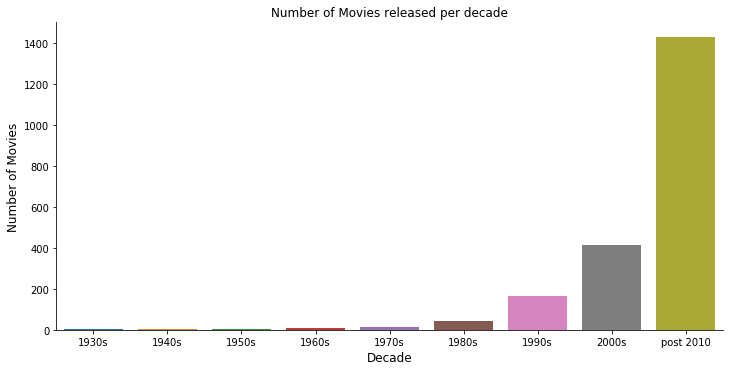

In [77]:
# Plot number of movies released per decade
sns.catplot(x = 'decade', kind = 'count', data = movies, aspect = 2)
plt.ylabel('Number of Movies', fontsize=12)
plt.xlabel('Decade', fontsize=12)
plt.title('Number of Movies released per decade', fontsize = 12)
plt.show()

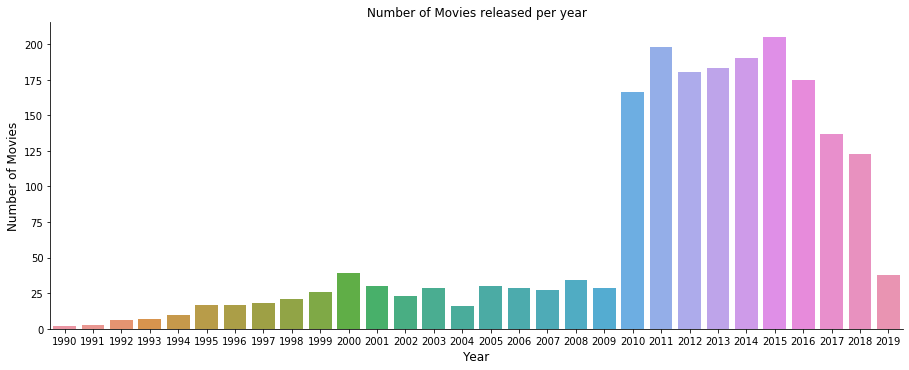

In [78]:
# Plot number of movies released per year 1990 onwards
sns.catplot(x = 'release_year', kind = 'count', data = movies[movies['release_year'] >=1990], aspect = 2.5)
plt.ylabel('Number of Movies', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Number of Movies released per year', fontsize = 12)
plt.show()

Conclusion TBD

## Profit and Profit Margin

The business value of this venture relies on making profit.

In [79]:
# Create profit column as worldwide_gross less production_budget
movies['profit'] = movies.apply(lambda x: (x['worldwide_gross']) - (x['production_budget']), axis = 1)

In [80]:
movies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres,decade,profit
0,2019-03-08,Captain Marvel,175000000,426525952,1123061550,2019,tt4154664,123.0,"Action,Adventure,Sci-Fi",post 2010,948061550
1,2019-05-31,Rocketman,41000000,57342725,108642725,2019,tt2066051,121.0,"Biography,Drama,Music",post 2010,67642725
2,2019-05-03,The Intruder,8000000,35095904,36005871,2019,tt6722030,102.0,"Drama,Horror,Mystery",post 2010,28005871
3,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,2019,tt7961060,100.0,"Action,Adventure,Animation",post 2010,114247755
4,2019-02-22,How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,2019,tt2386490,104.0,"Action,Adventure,Animation",post 2010,390258283


In [81]:
# Get summary statistics for profit
# Use plain formatting to remove scientific notation
movies['profit'].describe().apply(lambda x: format(x, 'f'))

count          2084.000000
mean       81112740.337332
std       183543483.470248
min      -200237650.000000
25%        -1406246.750000
50%        15904174.500000
75%        80066414.750000
max      2351345279.000000
Name: profit, dtype: object

In [82]:
# Create profit margin column
movies['profit_margin'] = movies.apply(lambda x: ((x['profit']) / (x['worldwide_gross']))*100, axis = 1)

In [83]:
# Get summary statistics for profit margin
# Use plain formatting to remove scientific notation
movies['profit_margin'].describe().apply(lambda x: format(x, 'f'))

count        2084.000000
mean        -3961.209081
std         87412.139510
min      -3846053.846154
25%           -41.432339
50%            48.808903
75%            74.379810
max            99.759941
Name: profit_margin, dtype: object

In [84]:
# Define recent movies - post 2010
recentmovies = movies[movies['release_year'] >= 2010]

In [85]:
topprofit = recentmovies.sort_values('profit', ascending = False)
topprofit.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres,decade,profit,profit_margin
138,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,tt4154756,149.0,"Action,Adventure,Sci-Fi",post 2010,1748134200,85.352522
484,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,tt0369610,124.0,"Action,Adventure,Sci-Fi",post 2010,1433854864,86.960647
655,2015-04-03,Furious 7,190000000,353007020,1518722794,2015,tt2820852,137.0,"Action,Crime,Thriller",post 2010,1328722794,87.489488
1091,2012-05-04,The Avengers,225000000,623279547,1517935897,2012,tt0848228,143.0,"Action,Adventure,Sci-Fi",post 2010,1292935897,85.177240
140,2018-02-16,Black Panther,200000000,700059566,1348258224,2018,tt1825683,134.0,"Action,Adventure,Sci-Fi",post 2010,1148258224,85.166046


In [86]:
topprofitmargin = recentmovies.sort_values('profit_margin', ascending = False)
topprofitmargin.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres,decade,profit,profit_margin
648,2015-07-10,The Gallows,100000,22764410,41656474,2015,tt2309260,81.0,"Horror,Mystery,Thriller",post 2010,41556474,99.759941
1154,2012-01-06,The Devil Inside,1000000,53262945,101759490,2012,tt1560985,83.0,Horror,post 2010,100759490,99.017291
1400,2011-04-01,Insidious,1500000,54009150,99870886,2011,tt1591095,103.0,"Horror,Mystery,Thriller",post 2010,98370886,98.498061
549,2015-04-17,Unfriended,1000000,32789645,64364198,2015,tt3713166,83.0,"Horror,Mystery,Thriller",post 2010,63364198,98.446341
1556,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,2010,tt1536044,91.0,Horror,2000s,174512032,98.309974


## Impact of Budget

In [87]:
# Describe production budget
movies['production_budget'].describe().apply(lambda x: '%.5f' % x)

count         2084.00000
mean      39546872.35893
std       51173832.04753
min           9000.00000
25%        7000000.00000
50%       20000000.00000
75%       50000000.00000
max      425000000.00000
Name: production_budget, dtype: object

In [88]:
# Define bins based on statistics
bins = [0, 7000000, 20000000, 50000000, np.inf]
names = ['<7m', '7-20m', '20-50m', '>50m']

In [89]:
# Create budget_range column
movies['budget_range'] = pd.cut(movies['production_budget'], bins, labels=names)

In [90]:
movies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres,decade,profit,profit_margin,budget_range
0,2019-03-08,Captain Marvel,175000000,426525952,1123061550,2019,tt4154664,123.0,"Action,Adventure,Sci-Fi",post 2010,948061550,84.417595,>50m
1,2019-05-31,Rocketman,41000000,57342725,108642725,2019,tt2066051,121.0,"Biography,Drama,Music",post 2010,67642725,62.261624,20-50m
2,2019-05-03,The Intruder,8000000,35095904,36005871,2019,tt6722030,102.0,"Drama,Horror,Mystery",post 2010,28005871,77.781401,7-20m
3,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,2019,tt7961060,100.0,"Action,Adventure,Animation",post 2010,114247755,93.075230,7-20m
4,2019-02-22,How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,2019,tt2386490,104.0,"Action,Adventure,Animation",post 2010,390258283,75.156872,>50m


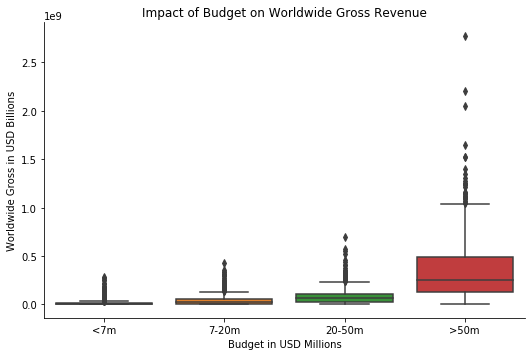

In [91]:
sns.catplot(x = 'budget_range', y = 'worldwide_gross', aspect =1.5, kind = 'box', data = movies)
plt.title('Impact of Budget on Worldwide Gross Revenue')
plt.xlabel('Budget in USD Millions')
plt.ylabel('Worldwide Gross in USD Billions')
plt.show()

In [92]:
recentmovies = movies[movies['release_year'] >= 2010]

In [93]:
recentmovies['production_budget'].describe().apply(lambda x: '%.5f' % x)

count         1595.00000
mean      42896169.29342
std       54635022.79016
min           9000.00000
25%        8000000.00000
50%       22000000.00000
75%       50000000.00000
max      410600000.00000
Name: production_budget, dtype: object

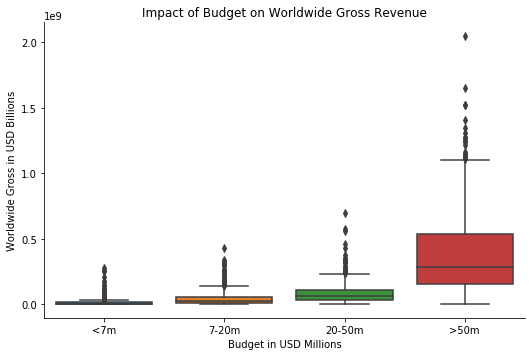

In [94]:
sns.catplot(x = 'budget_range', y = 'worldwide_gross', aspect =1.5, kind = 'box', data = recentmovies)
plt.title('Impact of Budget on Worldwide Gross Revenue')
plt.xlabel('Budget in USD Millions')
plt.ylabel('Worldwide Gross in USD Billions')
plt.show()

In [95]:
toprecentmovies = recentmovies.sort_values('worldwide_gross', ascending = False)[:100]

In [96]:
toprecentmovies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres,decade,profit,profit_margin,budget_range
138,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,tt4154756,149.0,"Action,Adventure,Sci-Fi",post 2010,1748134200,85.352522,>50m
484,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,tt0369610,124.0,"Action,Adventure,Sci-Fi",post 2010,1433854864,86.960647,>50m
655,2015-04-03,Furious 7,190000000,353007020,1518722794,2015,tt2820852,137.0,"Action,Crime,Thriller",post 2010,1328722794,87.489488,>50m
1091,2012-05-04,The Avengers,225000000,623279547,1517935897,2012,tt0848228,143.0,"Action,Adventure,Sci-Fi",post 2010,1292935897,85.177240,>50m
488,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,tt2395427,141.0,"Action,Adventure,Sci-Fi",post 2010,1072413963,76.436443,>50m


In [97]:
toprecentmovies['production_budget'].describe().apply(lambda x: '%.5f' % x)

count          100.00000
mean     167792000.00000
std       66933194.01169
min       35000000.00000
25%      126500000.00000
50%      170000000.00000
75%      200000000.00000
max      410600000.00000
Name: production_budget, dtype: object

In [98]:
bins = [0, 100000000, 150000000, 200000000, np.inf]
names = ['<100m', '100-150m', '150-200m','>200m' ]

In [99]:
toprecentmovies['budget_range'] = pd.cut(toprecentmovies['production_budget'], bins, labels=names)

In [100]:
toprecentmovies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres,decade,profit,profit_margin,budget_range
138,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,tt4154756,149.0,"Action,Adventure,Sci-Fi",post 2010,1748134200,85.352522,>200m
484,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,tt0369610,124.0,"Action,Adventure,Sci-Fi",post 2010,1433854864,86.960647,>200m
655,2015-04-03,Furious 7,190000000,353007020,1518722794,2015,tt2820852,137.0,"Action,Crime,Thriller",post 2010,1328722794,87.489488,150-200m
1091,2012-05-04,The Avengers,225000000,623279547,1517935897,2012,tt0848228,143.0,"Action,Adventure,Sci-Fi",post 2010,1292935897,85.177240,>200m
488,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,tt2395427,141.0,"Action,Adventure,Sci-Fi",post 2010,1072413963,76.436443,>200m


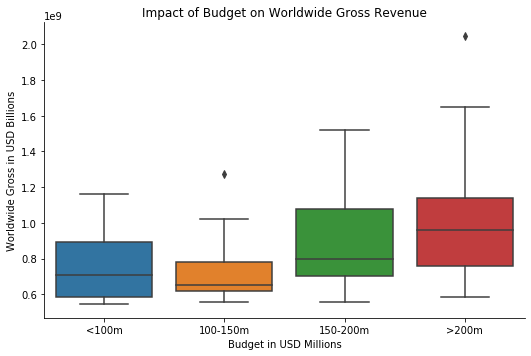

In [101]:
sns.catplot(x = 'budget_range', y = 'worldwide_gross', kind = 'box', aspect = 1.5, data = toprecentmovies)
plt.title('Impact of Budget on Worldwide Gross Revenue')
plt.xlabel('Budget in USD Millions')
plt.ylabel('Worldwide Gross in USD Billions')
plt.show()

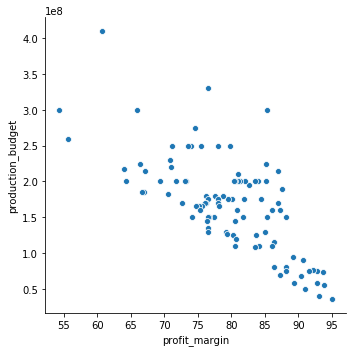

In [102]:
sns.relplot(x = 'profit_margin', y = 'production_budget', data = toprecentmovies)

## Runtime

In [103]:
movies['runtime_minutes'].describe()

count    2084.000000
mean      101.222169
std        23.391840
min         4.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       312.000000
Name: runtime_minutes, dtype: float64

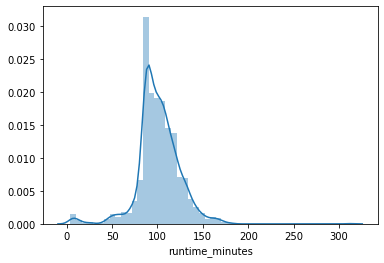

In [104]:
sns.distplot(movies['runtime_minutes'])

In [105]:
recentmovies['runtime_minutes'].describe()

count    1595.000000
mean      105.170533
std        20.575771
min         5.000000
25%        92.000000
50%       104.000000
75%       117.000000
max       181.000000
Name: runtime_minutes, dtype: float64

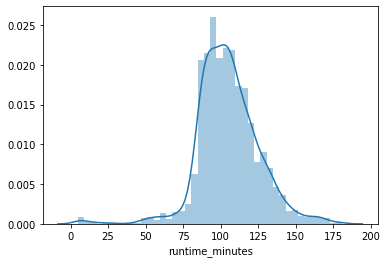

In [106]:
sns.distplot(recentmovies['runtime_minutes'])

In [107]:
toprecentmovies['runtime_minutes'].describe()

count    100.000000
mean     121.810000
std       23.017207
min       48.000000
25%      103.750000
50%      124.000000
75%      137.000000
max      169.000000
Name: runtime_minutes, dtype: float64

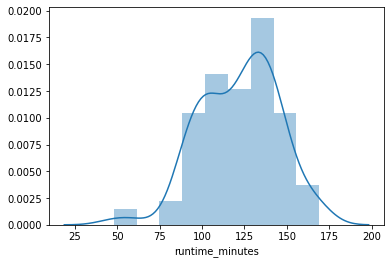

In [108]:
sns.distplot(toprecentmovies['runtime_minutes'])

## Genre

In [109]:
movies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres,decade,profit,profit_margin,budget_range
0,2019-03-08,Captain Marvel,175000000,426525952,1123061550,2019,tt4154664,123.0,"Action,Adventure,Sci-Fi",post 2010,948061550,84.417595,>50m
1,2019-05-31,Rocketman,41000000,57342725,108642725,2019,tt2066051,121.0,"Biography,Drama,Music",post 2010,67642725,62.261624,20-50m
2,2019-05-03,The Intruder,8000000,35095904,36005871,2019,tt6722030,102.0,"Drama,Horror,Mystery",post 2010,28005871,77.781401,7-20m
3,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,2019,tt7961060,100.0,"Action,Adventure,Animation",post 2010,114247755,93.075230,7-20m
4,2019-02-22,How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,2019,tt2386490,104.0,"Action,Adventure,Animation",post 2010,390258283,75.156872,>50m


In [110]:
# Obtain unique values in genres column
genres = movies['genres'].unique()
genres[:5]

array(['Action,Adventure,Sci-Fi', 'Biography,Drama,Music',
       'Drama,Horror,Mystery', 'Action,Adventure,Animation',
       'Adventure,Comedy,Family'], dtype=object)

In [111]:
# Split genres
splitgenres = []
for genre in genres:
    splitgenres += genre.split(',')
splitgenres[:5]

['Action', 'Adventure', 'Sci-Fi', 'Biography', 'Drama']

In [112]:
# Use set to obtain unique values
uniquegenres = set(splitgenres)
uniquegenres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [113]:
# Turn back to list to be able to sort alphabetically
listofgenres = list(uniquegenres)
sortedgenres = sorted(listofgenres)
sortedgenres[:5]

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy']

In [114]:
# Create columns with genres
for genre in sortedgenres:
    movies[genre] = 0

In [115]:
# Split genres in genres column
movies['genres'] = movies['genres'].map(lambda x : x.split(','))

In [116]:
# Map to columns - set to 1 if genre applies
for index, genres in enumerate(movies['genres']):
    for genre in genres:
        movies.loc[index,genre] = 1

In [117]:
# Checking it worked with example genre Action
movies[['genres','Action']][:5]

,genres,Action
0,"[Action, Adventure, Sci-Fi]",1
1,"[Biography, Drama, Music]",0
2,"[Drama, Horror, Mystery]",0
3,"[Action, Adventure, Animation]",1
4,"[Action, Adventure, Animation]",1


In [118]:
# genre counter function
def genrecounter(df):
    '''
    param1 df: dataframe
    returns dictionary with genre key and value count
    also sorts dictionary based on values and removes nul values
    ''' 
    # Start with empty dictionary
    genredict = {}
    
    # Get genre columns
    genrecols = df.loc[:, 'Action':'Western'].columns
    
    # Go through each column and sum it
    for col in genrecols:
        genredict[col] = df[col].sum()
        
    # sort dictionary based on counts, ascending order so reverse = True    
    sortedgenresdict = {keys: values for keys, values in \
                        sorted(genredict.items(), key = lambda item: item[1], reverse = True)}
    
    # remove any key-value pairs where the value is 0
    nonnulgenresdict = {keys: values for keys, values in \
                        sortedgenresdict.items() if values != 0}

    return nonnulgenresdict

In [119]:
# Run genre counter function on Movies DataFrame
allgenrescount = genrecounter(movies)
allgenrescount

{'Drama': 999,
 'Comedy': 597,
 'Action': 494,
 'Adventure': 380,
 'Thriller': 322,
 'Crime': 258,
 'Horror': 231,
 'Romance': 223,
 'Documentary': 188,
 'Biography': 162,
 'Sci-Fi': 159,
 'Mystery': 151,
 'Fantasy': 136,
 'Family': 114,
 'Animation': 113,
 'Music': 61,
 'History': 55,
 'Sport': 44,
 'War': 34,
 'Western': 19,
 'Musical': 12,
 'News': 3}

In [120]:
def genreplot(dictionary,title):
    x_values = list(dictionary.keys())
    y_values = list(dictionary.values())
    plt.figure(figsize = (15,10))
    sns.barplot(y = x_values, x = y_values)
    plt.xlabel('Number of movies')
    plt.ylabel('Genre')
    plt.title(title)
    return plt.show()

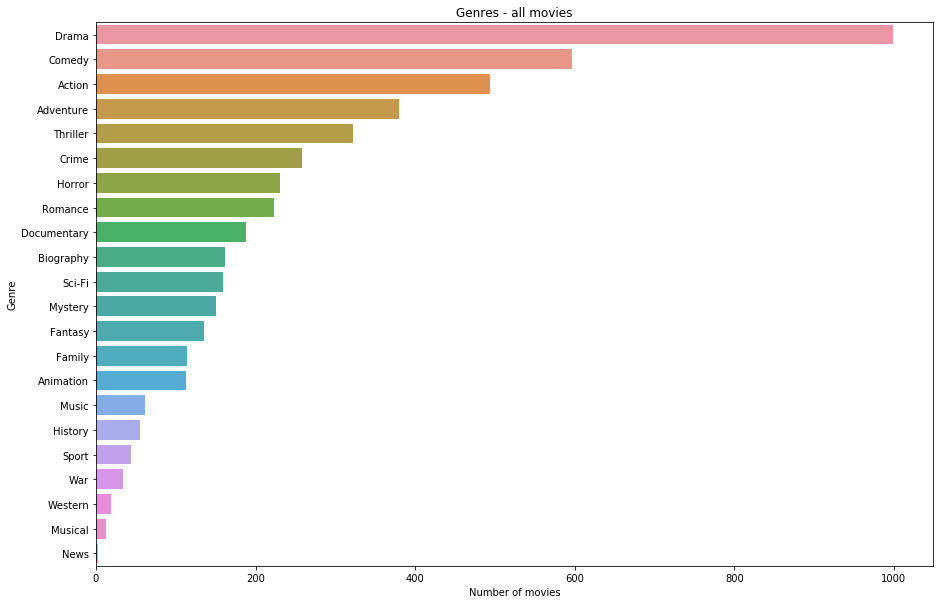

In [121]:
genreplot(allgenrescount,'Genres - all movies')

In [122]:
# Obtain recent movies
recentmovies = movies[movies['release_year'] >= 2010]

# Run genre counter function on recentmovies DataFrame
recentgenrescount = genrecounter(recentmovies)
recentgenrescount

{'Drama': 772,
 'Comedy': 524,
 'Action': 440,
 'Adventure': 347,
 'Thriller': 248,
 'Crime': 232,
 'Romance': 193,
 'Horror': 179,
 'Biography': 142,
 'Sci-Fi': 138,
 'Mystery': 128,
 'Fantasy': 125,
 'Animation': 103,
 'Documentary': 91,
 'Family': 87,
 'Music': 51,
 'History': 48,
 'Sport': 33,
 'War': 24,
 'Western': 14,
 'Musical': 7,
 'News': 2}

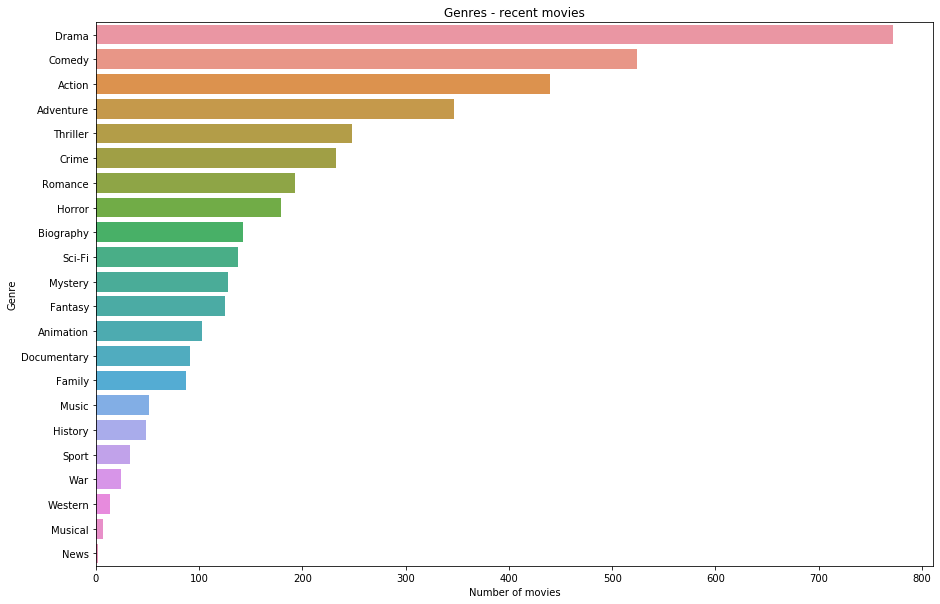

In [123]:
# Plot recent movie genres
genreplot(recentgenrescount,'Genres - recent movies')

In [124]:
# Obtain top recent movies
toprecentmovies = recentmovies.sort_values('worldwide_gross', ascending = False)[:100]

# Run genre counter function on toprecentmovies DataFrame
toprecentgenrescount = genrecounter(toprecentmovies)
toprecentgenrescount

{'Adventure': 82,
 'Action': 60,
 'Sci-Fi': 31,
 'Comedy': 30,
 'Animation': 26,
 'Fantasy': 19,
 'Drama': 12,
 'Thriller': 10,
 'Family': 9,
 'Crime': 3,
 'Biography': 2,
 'Documentary': 1,
 'Horror': 1,
 'Music': 1,
 'Musical': 1,
 'Mystery': 1,
 'Romance': 1}

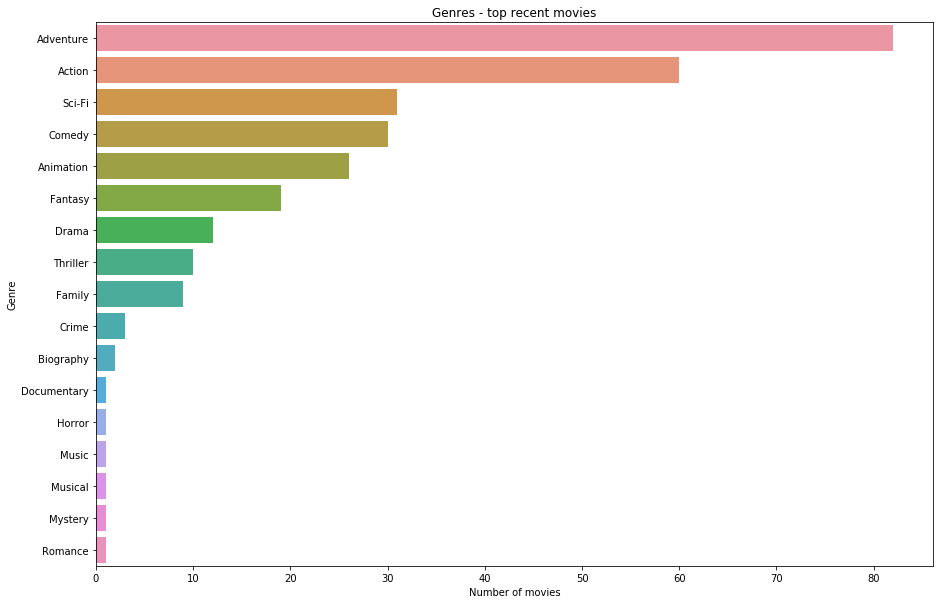

In [125]:
# Plot top recent movie genres
genreplot(toprecentgenrescount,'Genres - top recent movies')

In [126]:
topactionmovies = toprecentmovies[(toprecentmovies['Action'] == 1) | (toprecentmovies['Adventure'] == 1)]

In [127]:
topactionmovies['production_budget'].describe().apply(lambda x: format(x, 'f'))

count           89.000000
mean     176631460.674157
std       62631482.780964
min       58000000.000000
25%      145000000.000000
50%      175000000.000000
75%      200000000.000000
max      410600000.000000
Name: production_budget, dtype: object

In [128]:
recentmovies['production_budget'].describe().apply(lambda x: format(x, 'f'))

count         1595.000000
mean      42896169.293417
std       54635022.790158
min           9000.000000
25%        8000000.000000
50%       22000000.000000
75%       50000000.000000
max      410600000.000000
Name: production_budget, dtype: object

## Release date

## Exploring franchises

# Conclusion and Future Work